<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/math-and-architectures-of-deep-learning/introduction-to-vectors-matrices-and-tensors/03_orthogonal_matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Orthogonal(Rotation) Matrices

Let's consider an overview of rotation (aka orthogonal) matrices.

Of all transforms, rotation transforms have a special intuitive appeal because of their
highly observable behavior in the mechanical world. 

Furthermore, they play a significant
role in development and analysis of several machine learning tools.

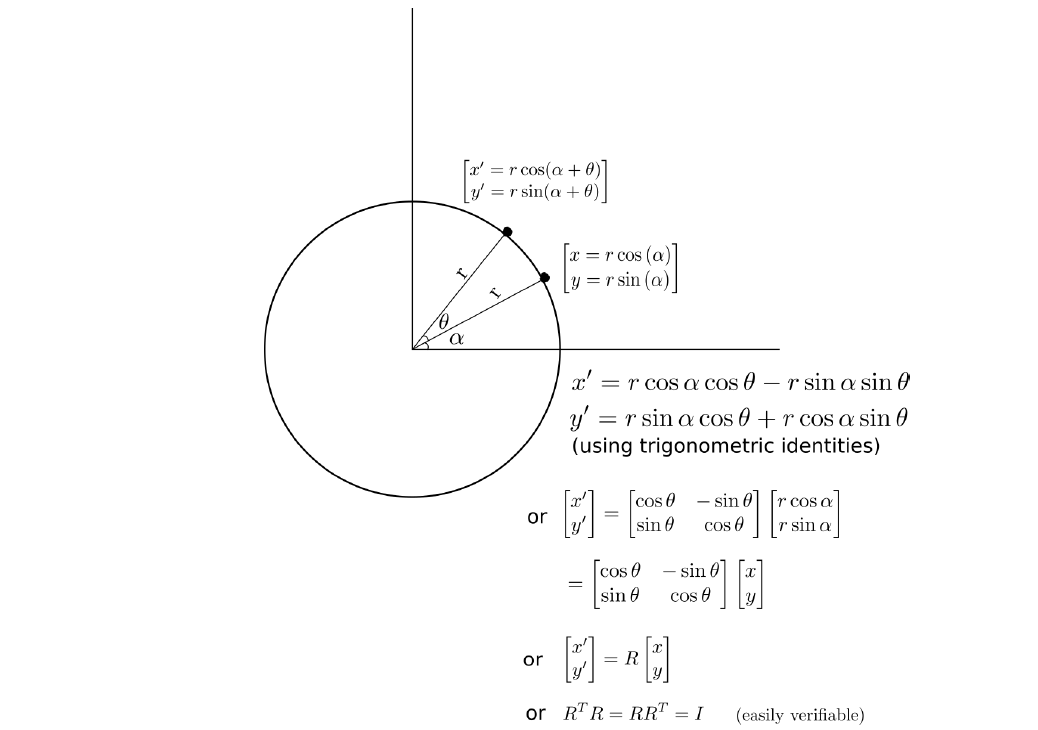


By definition rotation does not change
the distance from the center of rotation, that is what the circle indicates.

Some well known rotation matrices:

* Planar Rotation by angle $\theta$ about Origin:

$$ 
R_{2d} =
\begin{bmatrix}
        cos\theta & -sin\theta \\
        sin\theta & cos\theta \\
\end{bmatrix}
$$

* Rotation by angle $\theta$ in 3D space about Z axis:

$$ 
R_{3dz} =
\begin{bmatrix}
        cos\theta & -sin\theta & 0 \\
        sin\theta & cos\theta & 0 \\
        0 & 0 & 1 
\end{bmatrix}
$$

Note that the z coordinate remains unaffected by this rotation, viz.,

$$ 
\begin{bmatrix}
        cos\theta & -sin\theta & 0 \\
        sin\theta & cos\theta & 0 \\
        0 & 0 & 1 
\end{bmatrix}
=
\begin{bmatrix}
        x \\
        y \\
        z 
\end{bmatrix}
=
\begin{bmatrix}
        . \\
        . \\
        z 
\end{bmatrix}
$$

* Rotation by angle $\theta$ in 3D space about X axis:

$$ 
R_{3dx} =
\begin{bmatrix}
        1 & 0 & 0 \\
        0 & cos\theta & -sin\theta \\
        0 & sin\theta & cos\theta \\ 
\end{bmatrix}
$$

Note that the X coordinate remains unaffected by this rotation, viz.,

$$ 
\begin{bmatrix}
        1 & 0 & 0 \\
        0 & cos\theta & -sin\theta \\
        0 & sin\theta & cos\theta \\
\end{bmatrix}
=
\begin{bmatrix}
        x \\
        y \\
        z 
\end{bmatrix}
=
\begin{bmatrix}
        x \\
        . \\
        . 
\end{bmatrix}
$$

* Rotation by angle $\theta$ in 3D space about Y axis:

$$ 
R_{3dy} =
\begin{bmatrix}
        cos\theta & 0 & -sin\theta \\
        0 & 1 & 0 \\
        sin\theta & 0 & cos\theta \\ 
\end{bmatrix}
$$

Note that the Y coordinate remains unaffected by this rotation, viz.,

$$ 
\begin{bmatrix}
        cos\theta & 0 & -sin\theta \\
        0 & 1 & 0 \\
        sin\theta & 0 & cos\theta \\
\end{bmatrix}
=
\begin{bmatrix}
        x \\
        y \\
        z 
\end{bmatrix}
=
\begin{bmatrix}
        . \\
        y \\
        . 
\end{bmatrix}
$$


In [ ]:
import numpy as np
import torch

In [ ]:
torch.manual_seed(42)

Let us revisit our cat brain data set.

Notice that there are 15 training examples, with 3 unkwnowns (w0, w1, b).
This is an over determined system.

It can be easily seen that the solution is roughly
$w_{0} = 1, w_{1} = 1, b = -1$.

It has been deliberately chosen as such.
But the equations are not fully consistent (i.e., there is
 no solution that satisfies all the equations).
 
We want to find the best values such that it minimizes $Aw - b$.
This is what the pseudo-inverse does.

In [ ]:
def pseudo_inverse(A):
  return torch.matmul(torch.linalg.inv(torch.matmul(A.T, A)), A.T)

In [ ]:
# The usual cat-brain input dataset
X = torch.tensor([
  [0.11, 0.09], [0.01, 0.02], [0.98, 0.91], [0.12, 0.21],
  [0.98, 0.99], [0.85, 0.87], [0.03, 0.14], [0.55, 0.45],
  [0.49, 0.51], [0.99, 0.01], [0.02, 0.89], [0.31, 0.47],
  [0.55, 0.29], [0.87, 0.76], [0.63, 0.24]
])

# Output threat score modeled as a vector
y = torch.tensor([-0.8, -0.97, 0.89, -0.67, 0.97, 0.72, -0.83, 0.00, 0.00, 0.00, -0.09, -0.22, -0.16, 0.63, 0.37])
# Column stack will add an additional column of 1s to the training dataset to represent the coefficient of the bias
A = torch.column_stack((X, torch.ones(15)))  # A is the augmented data matrix

# Pseudo-inverse finds the ”best fit” solution - minimizes total error for all the equations
w = torch.matmul(pseudo_inverse(A), y)
# Expect the solution to be close to [1, 1, -1]
print(f"The solution is {w}\nNote that this is almost equal to [1.0, 1.0, -1.0])")

The solution is tensor([ 1.0766,  0.8976, -0.9582])
Note that this is almost equal to [1.0, 1.0, -1.0])
